In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import distplot
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import math
import statistics 
import scipy
import scipy.stats as stats
from scipy.stats.distributions import norm
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import kurtosis,skew
from statistics import stdev,mean
import sqlite3

In [2]:
n=['ID','Age','Gender','Education','Country','Ethnicity','Nscore','Escore','OpenessToExperience','Ascore','Cscore','Impulsiveness','SightSensation','Alcohol','Amphet','Amyl','Benzos','Caff','Cannabis','Chocolate','Cocaine','Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD','Meth','Mushrooms','Nicotine','Semer','VSA']

In [5]:
df= pd.read_csv("drug_consumption.data",names=n)

In [6]:
df.describe()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,OpenessToExperience,Ascore,Cscore,Impulsiveness,SightSensation
count,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,945.294960,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,545.167641,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,1.000000,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.000000,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.000000,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.000000,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [7]:
df.drop('ID', inplace = True, axis = 1)
#No need for ID Column

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 31 columns):
Age                    1885 non-null float64
Gender                 1885 non-null float64
Education              1885 non-null float64
Country                1885 non-null float64
Ethnicity              1885 non-null float64
Nscore                 1885 non-null float64
Escore                 1885 non-null float64
OpenessToExperience    1885 non-null float64
Ascore                 1885 non-null float64
Cscore                 1885 non-null float64
Impulsiveness          1885 non-null float64
SightSensation         1885 non-null float64
Alcohol                1885 non-null object
Amphet                 1885 non-null object
Amyl                   1885 non-null object
Benzos                 1885 non-null object
Caff                   1885 non-null object
Cannabis               1885 non-null object
Chocolate              1885 non-null object
Cocaine                1885 non-null object
C

In [9]:
df.Gender.replace(to_replace=[0.48246000000000006,-0.48246000000000006], value=[1,0], inplace=True)
#Using 1 for Female, 0 for Male

In [10]:
L = ['Alcohol','Amphet','Amyl','Benzos','Caff','Cannabis','Chocolate','Cocaine','Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD','Meth','Mushrooms','Nicotine','Semer','VSA']
for i in L:
    df[i] = df[i].map(lambda x: str(x)[2:])
#Removing CL from Drug columns

In [11]:
B=['Alcohol','Amphet','Amyl','Benzos','Caff','Cannabis','Chocolate','Cocaine','Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD','Meth','Mushrooms','Nicotine','Semer','VSA']
for i in B:
    df[i]=df[i].astype(int)
#Changing all the types from objects into integers

In [12]:
df = df.loc[df['Semer'] == 0]
#Removing all the possible liars in dataset your said they did the fake drug 'Semer', All 8 of them

In [13]:
df.drop('Semer', inplace = True, axis = 1)
#Removing Semer Column since will be all zeroes, no need for it

In [15]:
D=['Crack','Heroin','Ketamine']
df['HardDrugUse'] = df[D].sum(axis=1)
df.loc[df.HardDrugUse > 0, 'HardDrugUse'] = 1

#New Feature, target feature, whether used Hard drugs or not
#Target Variable: 0 for never Used, 1 has Used
#Original List D=['Cocaine','Crack','Ecstasy','Heroin','Ketamine','LSD','Mushrooms']


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1877 entries, 0 to 1884
Data columns (total 31 columns):
Age                    1877 non-null float64
Gender                 1877 non-null float64
Education              1877 non-null float64
Country                1877 non-null float64
Ethnicity              1877 non-null float64
Nscore                 1877 non-null float64
Escore                 1877 non-null float64
OpenessToExperience    1877 non-null float64
Ascore                 1877 non-null float64
Cscore                 1877 non-null float64
Impulsiveness          1877 non-null float64
SightSensation         1877 non-null float64
Alcohol                1877 non-null int64
Amphet                 1877 non-null int64
Amyl                   1877 non-null int64
Benzos                 1877 non-null int64
Caff                   1877 non-null int64
Cannabis               1877 non-null int64
Chocolate              1877 non-null int64
Cocaine                1877 non-null int64
Crack    

In [17]:
df['Gender'] = df['Gender'].apply(lambda x: 'Female' if x == 1 else 'Male')
df['Gender'] = df['Gender'].astype('category')
gender = pd.get_dummies(df['Gender'], drop_first = True)
df= pd.concat([df,gender],axis=1)

#Dummy Indicator feature for Male or Female

In [18]:
df.Age.replace(to_replace=[-0.9519700000000001,-0.07854,0.49788000000000004,1.09449,1.82213,2.59171], value=[1,1,2,2,3,3], inplace=True)
df['Age'] = df['Age'].astype(int)
dummy = pd.get_dummies(df['Age'])
df= pd.concat([df,dummy], axis=1)
df.rename(columns={1:"Young",2:"MidAge",3:"Old"}, inplace = True)

#Creating Dummy Variables for Young, MidAge, Old 

In [19]:
df['Country'] = df['Country'].apply(lambda x:'UK' if x == 0.9608200000000001 else '')
df['Country'] = df['Country'].astype('category')
country = pd.get_dummies(df['Country'], drop_first = True)
df= pd.concat([df,country],axis=1)

#Making Dummy variable for anyone who is from the UK

In [20]:
df['Education'] = df['Education'].apply(lambda x:'MadeitToCollege' if x >= -0.61113 else '')
df['Education'] = df['Education'].astype('category')
education = pd.get_dummies(df['Education'], drop_first = True)
df= pd.concat([df,education],axis=1)

#Dummy for whether they Made it to college

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1877 entries, 0 to 1884
Data columns (total 37 columns):
Age                    1877 non-null int64
Gender                 1877 non-null category
Education              1877 non-null category
Country                1877 non-null category
Ethnicity              1877 non-null float64
Nscore                 1877 non-null float64
Escore                 1877 non-null float64
OpenessToExperience    1877 non-null float64
Ascore                 1877 non-null float64
Cscore                 1877 non-null float64
Impulsiveness          1877 non-null float64
SightSensation         1877 non-null float64
Alcohol                1877 non-null int64
Amphet                 1877 non-null int64
Amyl                   1877 non-null int64
Benzos                 1877 non-null int64
Caff                   1877 non-null int64
Cannabis               1877 non-null int64
Chocolate              1877 non-null int64
Cocaine                1877 non-null int64
Crack   

In [22]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1877.0,1.464038,0.605951,1.00000,1.00000,1.00000,2.00000,3.00000
Ethnicity,1877.0,-0.309728,0.166220,-1.10702,-0.31685,-0.31685,-0.31685,1.90725
Nscore,1877.0,-0.000551,0.998442,-3.46436,-0.67825,0.04257,0.62967,3.27393
Escore,1877.0,-0.001951,0.997418,-3.27393,-0.69509,0.00332,0.63779,3.27393
OpenessToExperience,1877.0,-0.003224,0.995691,-3.27393,-0.71727,-0.01928,0.72330,2.90161
Ascore,1877.0,-0.000657,0.996689,-3.46436,-0.60633,-0.01729,0.76096,3.46436
Cscore,1877.0,-0.000394,0.997657,-3.46436,-0.65253,-0.00665,0.58489,3.46436
Impulsiveness,1877.0,0.005293,0.954148,-2.55524,-0.71126,-0.21712,0.52975,2.90161
SightSensation,1877.0,-0.007408,0.962074,-2.07848,-0.52593,0.07987,0.76540,1.92173
Alcohol,1877.0,4.637720,1.328234,0.00000,4.00000,5.00000,6.00000,6.00000


In [23]:
df.drop('Old', inplace = True, axis = 1)
#Drop old because it can be identified from 0 for young and MidAge

In [24]:
df

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,OpenessToExperience,Ascore,Cscore,...,Meth,Mushrooms,Nicotine,VSA,HardDrugUse,Male,Young,MidAge,UK,MadeitToCollege
0,2,Female,MadeitToCollege,UK,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,2,0,0,0,0,1,1,1
1,1,Male,MadeitToCollege,UK,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,3,0,4,0,1,1,1,0,1,1
2,2,Male,MadeitToCollege,UK,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,1,0,0,0,1,0,1,1,1
3,1,Female,MadeitToCollege,UK,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,2,0,1,0,1,0,1,1
4,2,Female,MadeitToCollege,UK,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,0,2,2,0,0,0,0,1,1,1
5,3,Female,,,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,...,0,0,6,0,0,0,0,0,0,0
6,2,Male,MadeitToCollege,,-0.31685,-0.46725,-1.09207,-0.45174,-0.30172,0.93949,...,0,0,6,0,0,1,0,1,0,1
7,2,Male,,UK,-0.31685,-1.32828,1.93886,-0.84732,-0.30172,1.63088,...,0,0,0,0,0,1,0,1,1,0
8,2,Female,MadeitToCollege,,-0.31685,0.62967,2.57309,-0.97631,0.76096,1.13407,...,0,0,6,0,0,0,0,1,0,1
9,3,Male,MadeitToCollege,UK,-0.31685,-0.24649,0.00332,-1.42424,0.59042,0.12331,...,0,0,6,0,0,1,0,0,1,1


In [103]:
df.isnull().sum().sum()

0

In [104]:
#Creating new Column of sum total of WeakDrugs 
Weak_Drugs = ['Alcohol','Amphet','Amyl','Benzos','Caff','Cannabis','Chocolate','Legalh','Meth','Nicotine','VSA']
df['WeakDrugUse'] = df[Weak_Drugs].sum(axis=1)
df

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,OpenessToExperience,Ascore,Cscore,...,Mushrooms,Nicotine,VSA,HardDrugUse,Male,Young,MidAge,UK,MadeitToCollege,WeakDrugUse
0,2,Female,MadeitToCollege,UK,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,2,0,0,0,0,1,1,1,22
1,1,Male,MadeitToCollege,UK,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,0,4,0,1,1,1,0,1,1,32
2,2,Male,MadeitToCollege,UK,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,1,0,0,0,1,0,1,1,1,19
3,1,Female,MadeitToCollege,UK,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,2,0,1,0,1,0,1,1,20
4,2,Female,MadeitToCollege,UK,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,2,2,0,0,0,0,1,1,1,24
5,3,Female,,,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,...,0,6,0,0,0,0,0,0,0,18
6,2,Male,MadeitToCollege,,-0.31685,-0.46725,-1.09207,-0.45174,-0.30172,0.93949,...,0,6,0,0,1,0,1,0,1,24
7,2,Male,,UK,-0.31685,-1.32828,1.93886,-0.84732,-0.30172,1.63088,...,0,0,0,0,1,0,1,1,0,15
8,2,Female,MadeitToCollege,,-0.31685,0.62967,2.57309,-0.97631,0.76096,1.13407,...,0,6,0,0,0,0,1,0,1,22
9,3,Male,MadeitToCollege,UK,-0.31685,-0.24649,0.00332,-1.42424,0.59042,0.12331,...,0,6,0,0,1,0,0,1,1,27


In [105]:
#New Column for if the person consumed nicotine in the past year 
df['Past_Year_Nicotine'] = np.where(df['Nicotine']>2, 1,0)



In [106]:
df

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,OpenessToExperience,Ascore,Cscore,...,Nicotine,VSA,HardDrugUse,Male,Young,MidAge,UK,MadeitToCollege,WeakDrugUse,Past_Year_Nicotine
0,2,Female,MadeitToCollege,UK,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,2,0,0,0,0,1,1,1,22,0
1,1,Male,MadeitToCollege,UK,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,4,0,1,1,1,0,1,1,32,1
2,2,Male,MadeitToCollege,UK,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,1,0,1,1,1,19,0
3,1,Female,MadeitToCollege,UK,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,2,0,1,0,1,0,1,1,20,0
4,2,Female,MadeitToCollege,UK,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,2,0,0,0,0,1,1,1,24,0
5,3,Female,,,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,...,6,0,0,0,0,0,0,0,18,1
6,2,Male,MadeitToCollege,,-0.31685,-0.46725,-1.09207,-0.45174,-0.30172,0.93949,...,6,0,0,1,0,1,0,1,24,1
7,2,Male,,UK,-0.31685,-1.32828,1.93886,-0.84732,-0.30172,1.63088,...,0,0,0,1,0,1,1,0,15,0
8,2,Female,MadeitToCollege,,-0.31685,0.62967,2.57309,-0.97631,0.76096,1.13407,...,6,0,0,0,0,1,0,1,22,1
9,3,Male,MadeitToCollege,UK,-0.31685,-0.24649,0.00332,-1.42424,0.59042,0.12331,...,6,0,0,1,0,0,1,1,27,1


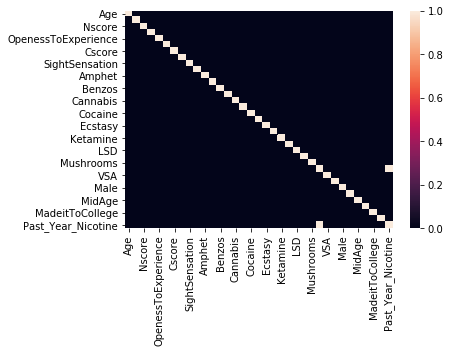

In [107]:
sns.heatmap(df.corr()>0.75) 
#Checking for Multicollinearity 

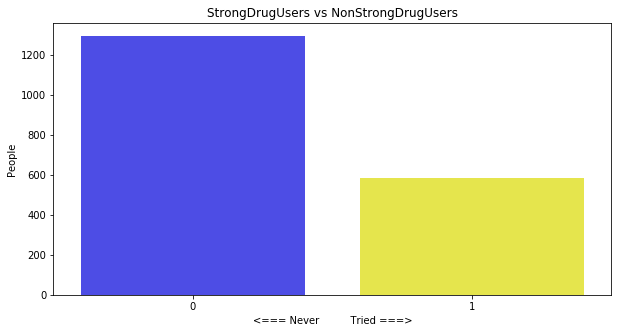

HardDrugUse
HardDrugUse
0    1295
1     582
Name: HardDrugUse, dtype: int64


In [25]:
plt.figure(figsize = (10,5))
sns.countplot(df['HardDrugUse'], alpha =.80, palette= ['blue','yellow'])
plt.title('StrongDrugUsers vs NonStrongDrugUsers')
plt.ylabel('People')
plt.xlabel('<=== Never          Tried ===>')
plt.show()
print('HardDrugUse')
print(df.groupby(['HardDrugUse']).HardDrugUse.count())

#Showing the amount of people who've done Hard drugs compared to people who never have.

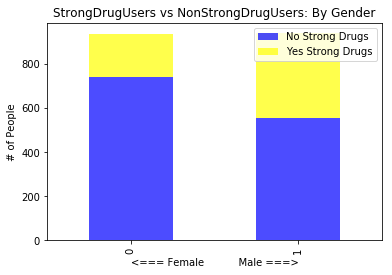

In [109]:
#show if male or female tend to try hard drugs more
sex = df.groupby(['Male','HardDrugUse']).Male.count().unstack()
s1 = sex.plot(kind = 'bar', stacked = True, 
                   title = 'StrongDrugUsers vs NonStrongDrugUsers: By Gender', 
                   color = ['blue','yellow'], alpha = .70)
s1.set_xlabel('<=== Female           Male ===>')
s1.set_ylabel('# of People')
s1.legend(['No Strong Drugs','Yes Strong Drugs'])
plt.show()
#Are Female nearly twice as likely to say no to hard drugs?


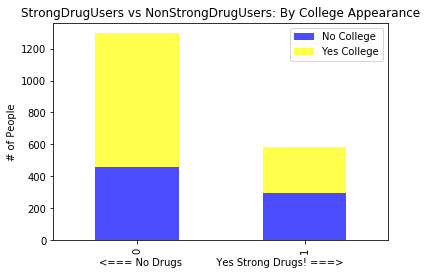

In [110]:
ed = df.groupby(['HardDrugUse','MadeitToCollege']).MadeitToCollege.count().unstack()
s2 = ed.plot(kind = 'bar', stacked = True, 
                   title = 'StrongDrugUsers vs NonStrongDrugUsers: By College Appearance', 
                   color = ['blue','yellow'], alpha = .70)
s2.set_xlabel('<=== No Drugs           Yes Strong Drugs! ===>')
s2.set_ylabel('# of People')
s2.legend(['No College','Yes College'])
plt.show()

#Showing Comparison of People who took/didn't take Hard drugs and went/didn't go to college 
#Shows that nearly half the people who have taken Hard drugs, also went to college
#Seems that it may be less likely to say no to drugs, without a college education

In [111]:
df

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,OpenessToExperience,Ascore,Cscore,...,Nicotine,VSA,HardDrugUse,Male,Young,MidAge,UK,MadeitToCollege,WeakDrugUse,Past_Year_Nicotine
0,2,Female,MadeitToCollege,UK,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,2,0,0,0,0,1,1,1,22,0
1,1,Male,MadeitToCollege,UK,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,4,0,1,1,1,0,1,1,32,1
2,2,Male,MadeitToCollege,UK,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,1,0,1,1,1,19,0
3,1,Female,MadeitToCollege,UK,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,2,0,1,0,1,0,1,1,20,0
4,2,Female,MadeitToCollege,UK,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,2,0,0,0,0,1,1,1,24,0
5,3,Female,,,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,...,6,0,0,0,0,0,0,0,18,1
6,2,Male,MadeitToCollege,,-0.31685,-0.46725,-1.09207,-0.45174,-0.30172,0.93949,...,6,0,0,1,0,1,0,1,24,1
7,2,Male,,UK,-0.31685,-1.32828,1.93886,-0.84732,-0.30172,1.63088,...,0,0,0,1,0,1,1,0,15,0
8,2,Female,MadeitToCollege,,-0.31685,0.62967,2.57309,-0.97631,0.76096,1.13407,...,6,0,0,0,0,1,0,1,22,1
9,3,Male,MadeitToCollege,UK,-0.31685,-0.24649,0.00332,-1.42424,0.59042,0.12331,...,6,0,0,1,0,0,1,1,27,1


In [26]:
Hdrugs = ['Crack','Heroin','Ketamine','Nscore','Escore','OpenessToExperience','Ascore','Cscore','Impulsiveness','SightSensation']
for i in Hdrugs:
    df.drop(i, inplace = True, axis = 1)
df.drop('Age', inplace = True, axis = 1)
df.drop('Gender', inplace = True, axis = 1)
df.drop('Education', inplace = True, axis = 1)
df.drop('Country', inplace = True, axis = 1)
df.drop('Nicotine', inplace = True, axis = 1)




#Taking out HardDrugs that were used to calculate HardDrugUse column
#Original Hdrugs = ['Cocaine','Crack','Ecstasy','Heroin','Ketamine','LSD','Mushrooms']

In [27]:
df

,Ethnicity,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Chocolate,Cocaine,Ecstasy,...,LSD,Meth,Mushrooms,VSA,HardDrugUse,Male,Young,MidAge,UK,MadeitToCollege
0,0.12600,5,2,0,2,6,0,5,0,0,...,0,0,0,0,0,0,0,1,1,1
1,-0.31685,5,2,2,0,6,4,6,3,4,...,2,3,0,0,1,1,1,0,1,1
2,-0.31685,6,0,0,0,6,3,4,0,0,...,0,0,1,0,0,1,0,1,1,1
3,-0.31685,4,0,0,3,5,2,4,2,0,...,0,0,0,0,1,0,1,0,1,1
4,-0.31685,4,1,1,0,6,3,6,0,1,...,0,0,2,0,0,0,0,1,1,1
5,-0.31685,2,0,0,0,6,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
6,-0.31685,6,0,0,0,6,1,5,0,0,...,0,0,0,0,0,1,0,1,0,1
7,-0.31685,5,0,0,0,6,0,4,0,0,...,0,0,0,0,0,1,0,1,1,0
8,-0.31685,4,0,0,0,6,0,6,0,0,...,0,0,0,0,0,0,0,1,0,1
9,-0.31685,6,1,0,1,6,1,6,0,0,...,0,0,0,0,0,1,0,0,1,1


[0.0135285  0.03875735 0.05756008 0.04055346 0.0624465  0.03036121
 0.06302372 0.03464607 0.14288877 0.11030069 0.05981926 0.05641576
 0.07186871 0.08346248 0.03390448 0.02803222 0.01241306 0.01282139
 0.02662112 0.02057519]


/Users/kalkidanlemma/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


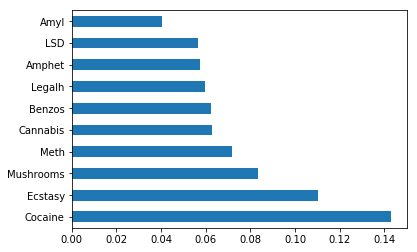

In [28]:
data = df
Xcol = df.drop('HardDrugUse', axis = 1)  #independent columns
ycol = df['HardDrugUse']   #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(Xcol,ycol)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=Xcol.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

#Doing Some Feature Importance for the top 10 performers, Cannabis leading the charge

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1877 entries, 0 to 1884
Data columns (total 21 columns):
Ethnicity          1877 non-null float64
Alcohol            1877 non-null int64
Amphet             1877 non-null int64
Amyl               1877 non-null int64
Benzos             1877 non-null int64
Caff               1877 non-null int64
Cannabis           1877 non-null int64
Chocolate          1877 non-null int64
Cocaine            1877 non-null int64
Ecstasy            1877 non-null int64
Legalh             1877 non-null int64
LSD                1877 non-null int64
Meth               1877 non-null int64
Mushrooms          1877 non-null int64
VSA                1877 non-null int64
HardDrugUse        1877 non-null int64
Male               1877 non-null uint8
Young              1877 non-null uint8
MidAge             1877 non-null uint8
UK                 1877 non-null uint8
MadeitToCollege    1877 non-null uint8
dtypes: float64(1), int64(15), uint8(5)
memory usage: 338.5 KB


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x = df.drop('HardDrugUse', axis = 1)
y = df['HardDrugUse']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state = 101)
lreg = LogisticRegression()
lreg.fit(x_train, y_train)
y_pred_lreg = lreg.predict(x_test)

#Start Modeling: Logistic Regression

/Users/kalkidanlemma/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [34]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score, precision_score, recall_score
print('Logistic Regression')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_lreg))
print('--'*40)
print('Classification Report')
print(classification_report(y_test,y_pred_lreg))
logreg_accuracy = round(accuracy_score(y_test, y_pred_lreg) * 100,2)
print('--'*40)
print('Accuracy', logreg_accuracy,'%')
LogReg_f1 = round(f1_score(y_test, y_pred_lreg)*100,2)
print('F1      ',LogReg_f1,'%')

#Scoring Logistic Regression

Logistic Regression
Confusion Matrix
[[229  29]
 [ 37  81]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       258
           1       0.74      0.69      0.71       118

   micro avg       0.82      0.82      0.82       376
   macro avg       0.80      0.79      0.79       376
weighted avg       0.82      0.82      0.82       376

--------------------------------------------------------------------------------
Accuracy 82.45 %
F1       71.05 %


In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)
from sklearn.svm import SVC
ksvc= SVC(kernel = 'rbf', random_state = 0)
ksvc.fit(x_train_sc, y_train)
y_pred_ksvc = ksvc.predict(x_test_sc)

#Kernel SVC (Support Vector Classifier) code 

/Users/kalkidanlemma/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/kalkidanlemma/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/kalkidanlemma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [36]:
print('Kernel SVC')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_ksvc))
print('--'*40)
print('Classification Report')
print(classification_report(y_test, y_pred_ksvc))
ksvc_accuracy = round(accuracy_score(y_test,y_pred_ksvc)*100,1)
print('--'*40)
print('Accuracy',ksvc_accuracy,'%')
KernelSVC_f1 = round(f1_score(y_test, y_pred_ksvc)*100,2)
print('F1      ',KernelSVC_f1,'%')


Kernel SVC
Confusion Matrix
[[221  37]
 [ 28  90]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       258
           1       0.71      0.76      0.73       118

   micro avg       0.83      0.83      0.83       376
   macro avg       0.80      0.81      0.80       376
weighted avg       0.83      0.83      0.83       376

--------------------------------------------------------------------------------
Accuracy 82.7 %
F1       73.47 %


In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x) 
scaled_features = scaler.transform(x) 
scaled_featuresdf = pd.DataFrame(scaled_features, columns = df.columns[:-1])
from sklearn.model_selection import train_test_split
X= scaled_featuresdf
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 101)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)

#KNN codes 

/Users/kalkidanlemma/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/kalkidanlemma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [38]:
print('K-Nearest Neighbors (KNN)')
print('k = 1')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred_knn))
print('--'*40)
print('Classification Report')
print(classification_report(y_test, y_pred_knn))
print('--'*40)
knn_accuracy = round(accuracy_score(y_test, y_pred_knn)*100,1)
print('Accuracy',knn_accuracy,'%')
Knn_f1 = round(f1_score(y_test, y_pred_knn)*100,2)
print('F1      ',Knn_f1,'%')


#Seeing KNN Results 

K-Nearest Neighbors (KNN)
k = 1


Confusion Matrix
[[218  40]
 [ 48  70]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       258
           1       0.64      0.59      0.61       118

   micro avg       0.77      0.77      0.77       376
   macro avg       0.73      0.72      0.72       376
weighted avg       0.76      0.77      0.76       376

--------------------------------------------------------------------------------
Accuracy 76.6 %
F1       61.4 %


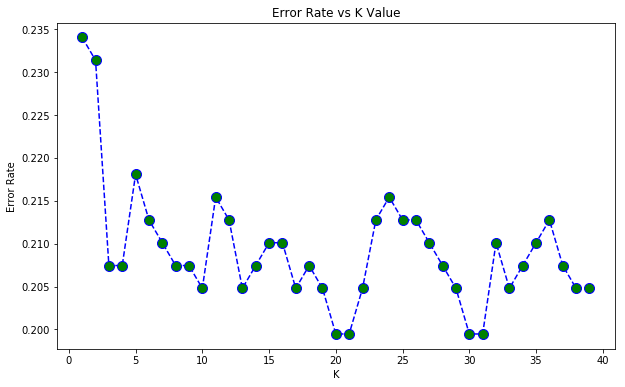

In [39]:
error_rate = []

for i in range (1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

# Plot error rate
plt.figure(figsize = (10,6))
plt.plot(range(1,40), error_rate, color = 'blue', linestyle = '--', marker = 'o', 
        markerfacecolor = 'green', markersize = 10)

plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

#Finding that Elbow to optimize my K


In [41]:
#Original HardDrug use with a Fitting Optimal k at 5
#Test Run seems optimal is at 22
#Test Run becomes optimal at 23 after taking out personality tests
knn = KNeighborsClassifier(n_neighbors = 23)
knn.fit(x_train,y_train)
y_pred_knn_op = knn.predict(x_test)
print('K-Nearest Neighbors(KNN)')
print('k = 5')
print('\n')
print(confusion_matrix(y_test, y_pred_knn_op))
print('--'*40)
print('Classfication Report',classification_report(y_test, y_pred_knn_op))
print('--'*40)
knn_op_accuracy =round(accuracy_score(y_test, y_pred_knn_op)*100,2)
print('Accuracy',knn_op_accuracy,'%')
OptKnn_f1 = round(f1_score(y_test, y_pred_knn_op)*100,2)
print('F1      ',OptKnn_f1,'%')



#KNN Classification with Optimal K

K-Nearest Neighbors(KNN)
k = 5


[[220  38]
 [ 42  76]]
--------------------------------------------------------------------------------
Classfication Report               precision    recall  f1-score   support

           0       0.84      0.85      0.85       258
           1       0.67      0.64      0.66       118

   micro avg       0.79      0.79      0.79       376
   macro avg       0.75      0.75      0.75       376
weighted avg       0.79      0.79      0.79       376

--------------------------------------------------------------------------------
Accuracy 78.72 %
F1       65.52 %


In [42]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)
y_pred_dtree = dtree.predict(x_test)
print('Decision Tree')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_dtree))
print('--'*40)
print('Classification Report',classification_report(y_test, y_pred_dtree))
print('--'*40)
dtree_accuracy = round(accuracy_score(y_test, y_pred_dtree)*100,2)
print('Accuracy',dtree_accuracy,'%')
dtree_f1 = round(f1_score(y_test, y_pred_dtree)*100,2)
print('F1      ',dtree_f1,'%')


#Decision Tree Scoring

Decision Tree


Confusion Matrix
[[216  42]
 [ 38  80]]
--------------------------------------------------------------------------------
Classification Report               precision    recall  f1-score   support

           0       0.85      0.84      0.84       258
           1       0.66      0.68      0.67       118

   micro avg       0.79      0.79      0.79       376
   macro avg       0.75      0.76      0.76       376
weighted avg       0.79      0.79      0.79       376

--------------------------------------------------------------------------------
Accuracy 78.72 %
F1       66.67 %


In [44]:
#Getting into Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(x_train,y_train)
y_pred_rfc = rfc.predict(x_test)
print('Random Forest')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_rfc))
print('--'*40)
print('Classification Report')
print(classification_report(y_test, y_pred_rfc))
print('--'*40)
rf_accuracy = round(accuracy_score(y_test, y_pred_rfc)*100,2)
print('Accuracy', rf_accuracy,'%')
rf_f1 = round(f1_score(y_test, y_pred_rfc)*100,2)
print('F1      ',rf_f1,'%')

#Random Forest scoring 

Random Forest


Confusion Matrix
[[229  29]
 [ 32  86]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       258
           1       0.75      0.73      0.74       118

   micro avg       0.84      0.84      0.84       376
   macro avg       0.81      0.81      0.81       376
weighted avg       0.84      0.84      0.84       376

--------------------------------------------------------------------------------
Accuracy 83.78 %
F1       73.82 %


Confusion Matrix, without normalization
[[229  29]
 [ 32  86]]


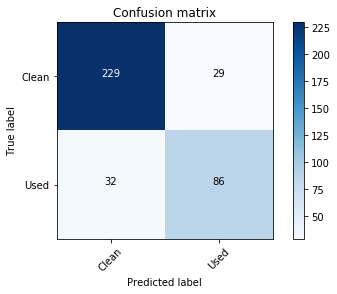

In [45]:
import itertools
import operator
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(False)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_rfc)
classes = ['Clean', 'Used']
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)




In [46]:
models = pd.DataFrame({
     'Model': ['Logistic Regression', 'Kernel SVC',
               'K-Nearest Neighbors','KNNopt', 'Decision Tree', 'Random Forest'],
    'Score': [logreg_accuracy, ksvc_accuracy, knn_accuracy,
               knn_op_accuracy, dtree_accuracy, rf_accuracy],
    'F1': [LogReg_f1,KernelSVC_f1,Knn_f1,OptKnn_f1,dtree_f1,rf_f1]})
    
models.sort_values(by='Score', ascending=False)

#Models Performance Chart

,Model,Score,F1
5,Random Forest,83.78,73.82
1,Kernel SVC,82.70,73.47
0,Logistic Regression,82.45,71.05
3,KNNopt,78.72,65.52
4,Decision Tree,78.72,66.67
2,K-Nearest Neighbors,76.60,61.40


In [141]:
#GridSearch Improvements for Random Forest
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
n_iter_search = 10
random_search = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=n_iter_search, cv=5, iid=False)
start = time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=5, iid=False)
start = time()
grid_search.fit(X, y)
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

RandomizedSearchCV took 15.05 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.823 (std: 0.025)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 2, 'min_samples_split': 8}

Model with rank: 2
Mean validation score: 0.821 (std: 0.033)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 4, 'min_samples_split': 6}

Model with rank: 3
Mean validation score: 0.820 (std: 0.029)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 5, 'min_samples_split': 6}

GridSearchCV took 87.01 seconds for 72 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.827 (std: 0.023)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'min_samples_split': 10}

Model with rank: 2
Mean validation score: 0.826 (std: 0.021)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_featu

In [143]:
#SVC Model with Gridsearch, but wouldnt run
from sklearn.metrics import classification_report
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                   scoring='%s_macro' %score)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()

NameError: name 'score' is not defined

In [144]:
from sklearn.model_selection import GridSearchCV
grid_params= {'n_neighbors': [3,5,11,19], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
gs= GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv = 3, n_jobs = -1)
gs_results= gs.fit(X_train,y_train)
gs_results.best_score_, gs_results.best_estimator_, gs_results.best_params_

#KNN Hypertuning with GridSearch

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    2.6s finished


(0.8059701492537313,
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
            metric_params=None, n_jobs=None, n_neighbors=19, p=2,
            weights='uniform'),
 {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'})

In [145]:
#Start of using XGBoost for randomforest 
import xgboost as xgb
from sklearn.metrics import mean_squared_error
data_dmatrix = xgb.DMatrix(data=X,label=y)
xg_reg = xgb.XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))


[20:17:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 0.406287


/Users/kalkidanlemma/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/kalkidanlemma/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [146]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)
cv_results.head()


[20:17:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:17:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:17:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.476225,0.000347,0.476948,0.000508
1,0.459237,0.000786,0.460902,0.002018
2,0.442548,0.002190,0.445176,0.003607
3,0.427027,0.001363,0.430177,0.003198
4,0.414984,0.000808,0.417925,0.003682


In [147]:
print((cv_results["test-rmse-mean"]).tail(1))

#Final boosting round metric

49    0.334501
Name: test-rmse-mean, dtype: float64


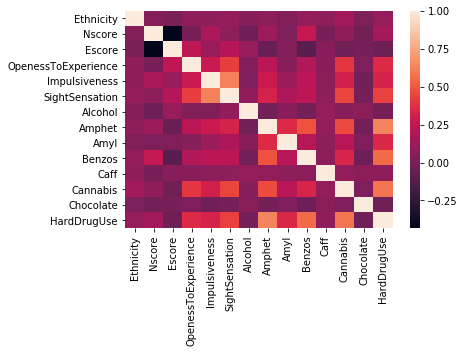

In [1170]:
PossiblePredictorsdf=df[['Young','MidAge','Ethnicity','Nscore','Escore','OpenessToExperience','Impulsiveness','SightSensation','Alcohol','Amphet','Amyl','Benzos','Caff','Cannabis','Chocolate','HardDrugUse']]
sns.heatmap(Predictorsdf.corr())

#Black Box around Nscore and Escore makes sense, essentially completley unrelated 

In [952]:
len(PossiblePredictorsdf.corr()>0.75) #Non are significantly collinear with eachother

14

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2288cda0>]],
      dtype=object)

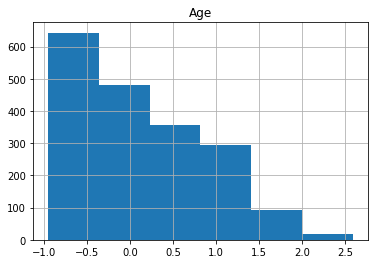

In [208]:
df.hist('Age',bins=6)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c22850c88>]],
      dtype=object)

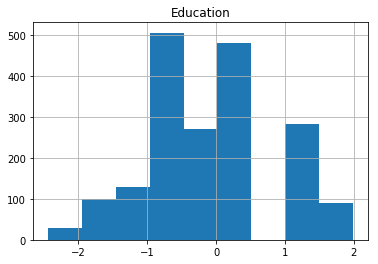

In [209]:
df.hist('Education',bins=9)

# df.hist('Country',bins=7)


In [212]:
df.Gender[0]

1.0

In [213]:
df.Country[6]

-0.57009

In [214]:
UKdf=df[df['Country']==0.9608200000000001]
UKdf
#55.38% of Our whole Data set

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,OpenessToExperience,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,1.0,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,0,0,0,0,0,0,0,2,0,0
1,2,-0.07854,0.0,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,4,0,2,0,2,3,0,4,0,0
2,3,0.49788,0.0,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,0,0,0,0,0,0,1,0,0,0
3,4,-0.95197,1.0,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,0,0,2,0,0,0,0,2,0,0
4,5,0.49788,1.0,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,1,0,0,1,0,0,2,2,0,0
7,8,0.49788,0.0,-1.73790,0.96082,-0.31685,-1.32828,1.93886,-0.84732,-0.30172,...,0,0,0,0,0,0,0,0,0,0
9,10,1.82213,0.0,1.16365,0.96082,-0.31685,-0.24649,0.00332,-1.42424,0.59042,...,0,0,0,0,0,0,0,6,0,0
10,11,-0.07854,1.0,0.45468,0.96082,-0.31685,-1.05308,0.80523,-1.11902,-0.76096,...,0,0,0,0,0,0,0,2,0,1
12,13,1.82213,1.0,0.45468,0.96082,-0.31685,2.28554,0.16767,0.44585,-1.62090,...,0,0,0,0,1,1,1,6,0,0
14,15,1.82213,1.0,-0.05921,0.96082,-0.31685,-0.92104,1.45421,0.44585,-0.60633,...,0,0,0,0,0,0,0,6,0,0


In [215]:
USAdf=df[df['Country']==-0.]
USAdf
#29.55%

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,OpenessToExperience,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
6,7,1.09449,0.0,1.16365,-0.57009,-0.31685,-0.46725,-1.09207,-0.45174,-0.30172,...,0,0,0,0,0,0,0,6,0,0
34,35,0.49788,0.0,0.45468,-0.57009,0.11440,1.02119,0.63779,0.88309,-2.90161,...,1,1,2,1,1,1,1,5,0,1
37,38,1.82213,0.0,-2.43591,-0.57009,-0.31685,0.31287,0.32197,1.06238,0.13136,...,0,0,0,0,1,0,1,6,0,0
118,119,0.49788,1.0,-0.61113,-0.57009,-0.31685,1.83990,-1.92173,-2.39883,1.11406,...,0,0,0,0,1,1,0,6,0,0
298,301,0.49788,1.0,-0.05921,-0.57009,-0.31685,0.82562,-0.94779,-0.17779,0.43852,...,0,0,0,0,0,0,0,0,0,0
299,302,-0.07854,1.0,-0.61113,-0.57009,-0.31685,-0.24649,-0.43999,-1.55521,0.13136,...,0,0,0,0,0,0,0,6,0,0
408,411,0.49788,1.0,-0.05921,-0.57009,-0.31685,-1.55078,0.80523,0.72330,0.28783,...,0,0,0,0,0,3,0,6,0,0
423,426,1.09449,1.0,1.98437,-0.57009,-0.31685,0.52135,0.00332,1.65653,0.94156,...,2,1,0,2,2,1,2,1,0,1
434,437,1.82213,0.0,-0.61113,-0.57009,-0.31685,-0.67825,-0.30033,1.06238,1.81866,...,0,0,0,0,1,0,0,0,0,0
436,439,-0.07854,1.0,0.45468,-0.57009,-0.31685,2.82196,-0.43999,-0.84732,-1.77200,...,0,2,0,2,0,2,2,6,0,0


In [216]:
USAdf.describe()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,OpenessToExperience,Ascore,Cscore,Impulsiveness,SightSensation
count,557.000000,557.000000,557.000000,557.000000,5.570000e+02,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000
mean,1218.854578,-0.386806,0.378815,-0.271702,-5.700900e-01,-0.282340,0.219114,-0.142980,0.452023,-0.164364,-0.260447,0.315267,0.426393
std,393.188934,0.780635,0.485528,0.771493,5.222739e-15,0.201572,1.039450,1.101548,0.944958,1.058373,0.996578,0.917225,0.900475
min,7.000000,-0.951970,0.000000,-2.435910,-5.700900e-01,-1.107020,-3.464360,-3.005370,-2.398830,-3.157350,-3.157350,-2.555240,-2.078480
25%,919.000000,-0.951970,0.000000,-0.611130,-5.700900e-01,-0.316850,-0.467250,-0.947790,-0.177790,-0.916990,-0.898910,-0.217120,-0.215750
50%,1190.000000,-0.951970,0.000000,-0.611130,-5.700900e-01,-0.316850,0.312870,-0.154870,0.445850,-0.154870,-0.276070,0.192680,0.401480
75%,1511.000000,-0.078540,1.000000,0.454680,-5.700900e-01,-0.316850,0.910930,0.637790,1.062380,0.590420,0.415940,0.881130,1.224700
max,1887.000000,2.591710,1.000000,1.984370,-5.700900e-01,1.907250,2.821960,3.273930,2.901610,3.464360,3.005370,2.901610,1.921730


In [217]:
UKdf.describe()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,OpenessToExperience,Ascore,Cscore,Impulsiveness,SightSensation
count,1044.000000,1044.000000,1044.000000,1044.000000,1.044000e+03,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,792.808429,0.297036,0.596743,0.196156,9.608200e-01,-0.328406,-0.113275,0.096193,-0.289304,0.142034,0.185405,-0.181237,-0.294735
std,567.743617,0.833548,0.490787,0.999423,1.055217e-14,0.141189,0.944287,0.934512,0.934818,0.947426,0.941202,0.928683,0.904043
min,1.000000,-0.951970,0.000000,-2.435910,9.608200e-01,-1.107020,-2.756960,-3.273930,-3.273930,-2.701720,-2.901610,-2.555240,-2.078480
25%,305.750000,-0.078540,0.000000,-0.611130,9.608200e-01,-0.316850,-0.791510,-0.575450,-0.976310,-0.453210,-0.405810,-0.711260,-0.846370
50%,629.500000,0.497880,1.000000,0.454680,9.608200e-01,-0.316850,-0.148820,0.003320,-0.317760,0.131360,0.191420,-0.217120,-0.215750
75%,1394.250000,1.094490,1.000000,1.163650,9.608200e-01,-0.316850,0.521350,0.805230,0.293380,0.760960,0.758300,0.529750,0.401480
max,1854.000000,2.591710,1.000000,1.984370,9.608200e-01,0.126000,3.273930,3.005370,2.901610,2.756960,3.005370,1.862030,1.921730
